In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r"C:\Users\Basu gupts\Downloads\adult_dataset-1 - adult_dataset-1.csv")
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,"£4,356.00",40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,"£4,356.00",18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,"£4,356.00",40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,"£3,900.00",40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,"£3,900.00",40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,£0.00,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,£0.00,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,£0.00,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,£0.00,40,United-States,<=50K


In [3]:
# Find the null values in different columns

df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      1
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [4]:
df.dropna(inplace=True)

In [5]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

In [6]:
#  Handle the missing values and noise values

df['income'].unique()

array(['<=50K', '>50K'], dtype=object)

In [7]:
# Drop “?” rows from all columns

df['workclass']=df['workclass'].str.replace('?',"")
df['occupation']=df['occupation'].str.replace('?',"")
df['capital.loss']=df['capital.loss'].str.replace('Pqrt',"")
df['native.country']=df['native.country'].str.replace('?',"")
df['income']=df['income'].str.replace('<=50K',"50")
df['income']=df['income'].str.replace('>50K',"49")

C:\Users\Basu gupts\AppData\Local\Temp\ipykernel_4084\1211569336.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['workclass']=df['workclass'].str.replace('?',"")
C:\Users\Basu gupts\AppData\Local\Temp\ipykernel_4084\1211569336.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['occupation']=df['occupation'].str.replace('?',"")
C:\Users\Basu gupts\AppData\Local\Temp\ipykernel_4084\1211569336.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['native.country']=df['native.country'].str.replace('?',"")


In [8]:
# . Check the data types of each columns

df.dtypes

age                int64
workclass         object
fnlwgt            object
education         object
education.num      int64
marital.status    object
occupation        object
relationship      object
race              object
sex               object
capital.gain       int64
capital.loss      object
hours.per.week     int64
native.country    object
income            object
dtype: object

In [9]:
# Find the different unique values in each categorical column

df1=df.select_dtypes(exclude=['int','float'])
for c in df1.columns:
    print(df1[c].unique())
    print(df1[c].value_counts())

['' 'Private' 'State-gov' 'Federal-gov' 'Self-emp-not-inc' 'Self-emp-inc'
 'Local-gov' 'Without-pay' 'Never-worked']
Private             22695
Self-emp-not-inc     2541
Local-gov            2093
                     1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64
['77053' '132870' '186061' ... '34066' '84661' '257302']
164190    13
203488    13
123011    13
121124    12
148995    12
          ..
183522     1
44419      1
442612     1
374833     1
257302     1
Name: fnlwgt, Length: 21649, dtype: int64
['HS-grad' 'Some-college' '7th-8th' '10th' 'Doctorate' 'Prof-school'
 'Bachelors' 'Masters' '11th' 'Assoc-acdm' 'Assoc-voc' '1st-4th' '5th-6th'
 '12th' '9th' 'Preschool']
HS-grad         10501
Some-college     7291
Bachelors        5354
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-sch

In [10]:
df.drop(['fnlwgt'],axis=1,inplace=True)
df.drop(['capital.loss'],axis=1,inplace=True)

In [11]:
col=['age','education.num','capital.gain','hours.per.week']

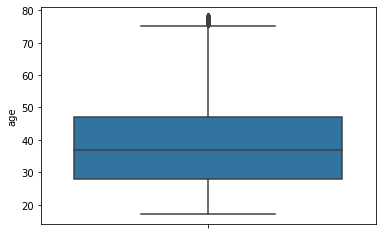

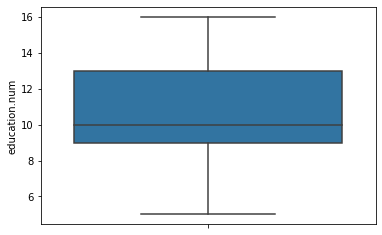

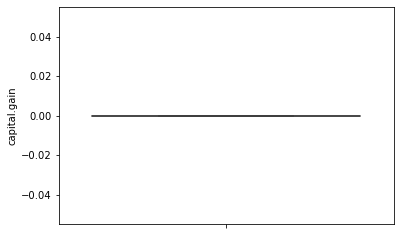

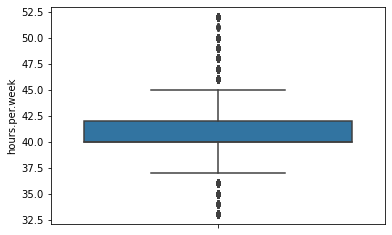

In [12]:
# Treat the outlier

for c in col:
    percentile25=df[c].quantile(0.25)
    percentile75=df[c].quantile(0.75)
    iqr=percentile75-percentile25
    upper_limit=percentile75+(1.5*iqr)
    lower_limit=percentile25-(1.5*iqr)
    df=df[df[c]<=upper_limit]
    df=df[df[c]>=lower_limit]
    plt.figure()
    sns.boxplot(y=c,data=df)


In [13]:
# Apply the encoding on categorical columns

from sklearn.preprocessing import LabelEncoder

In [14]:
le=LabelEncoder()

In [15]:
df['workclass']=le.fit_transform(df['workclass'])
df['education']=le.fit_transform(df['education'])
df['marital.status']=le.fit_transform(df['marital.status'])
df['relationship']=le.fit_transform(df['relationship'])
df['race']=le.fit_transform(df['race'])
df['sex']=le.fit_transform(df['sex'])
df['native.country']=le.fit_transform(df['native.country'])
df['income']=le.fit_transform(df['income'])
df['occupation']=le.fit_transform(df['occupation'])

In [16]:
# Apply the scaling on numerical columns

y=df.iloc [:,-1].values
x=df.drop('income',axis=1).values

In [17]:
# Split the data for training and testing

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
# Change the threshold probability of the logistic regression model to 60% and print
# the confusion matrix.

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.4, random_state = 1)

In [20]:
y_test

array([0, 1, 1, ..., 0, 1, 1])

In [21]:
x_test

array([[37,  6,  6, ...,  0, 40, 39],
       [54,  4,  8, ...,  0, 35, 39],
       [45,  4,  6, ...,  0, 50, 39],
       ...,
       [41,  4, 11, ...,  0, 50, 39],
       [19,  4,  8, ...,  0, 40, 39],
       [58,  4,  8, ...,  0, 40, 39]], dtype=int64)

In [22]:
# Train the logistic regression model, determine the training accuracy
# and testing accuracy, and print confusion Matrix

In [23]:
from sklearn.linear_model import LogisticRegression

In [24]:
lr=LogisticRegression()

In [25]:
lr.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [26]:
y_pred=lr.predict(x_test)
y_pred

array([1, 1, 1, ..., 1, 1, 1])

In [27]:
from sklearn.metrics import confusion_matrix

In [28]:
confusion_matrix(y_test,y_pred)

array([[ 479, 1417],
       [ 312, 6074]], dtype=int64)

In [29]:
confusion_matrix(y_test,y_pred).ravel()

array([ 479, 1417,  312, 6074], dtype=int64)

In [30]:
tn,fp,fn,tp=confusion_matrix(y_test,y_pred).ravel()

<AxesSubplot:>

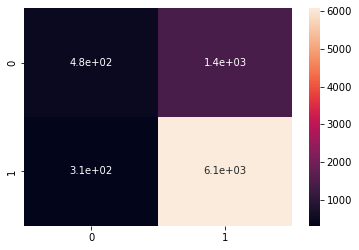

In [31]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)

In [32]:
from sklearn.metrics import accuracy_score

In [33]:
accuracy_score(y_test,y_pred)

0.7912340014489254

In [34]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred)

0.6018901281944549

In [35]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.61      0.25      0.36      1896
           1       0.81      0.95      0.88      6386

    accuracy                           0.79      8282
   macro avg       0.71      0.60      0.62      8282
weighted avg       0.76      0.79      0.76      8282



In [36]:
# Train the Decision tree model and determine the training accuracy and
# testing accuracy and print confusion Matrix.


In [37]:
from sklearn.model_selection import train_test_split

In [38]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size =0.2,random_state= 2)

In [39]:
from sklearn.tree import DecisionTreeClassifier

In [40]:
dc=DecisionTreeClassifier()

In [41]:
dc.fit(x_train,y_train)

DecisionTreeClassifier()

In [42]:
y_pred=dc.predict(x_test)
y_pred

array([1, 1, 0, ..., 0, 0, 1])

In [47]:
from sklearn.metrics import accuracy_score

In [48]:
accuracy_score(y_test,y_pred)

0.7833856556387346

In [49]:
from sklearn.metrics import confusion_matrix

In [50]:
confusion_matrix(y_test,y_pred)

array([[ 530,  389],
       [ 508, 2714]], dtype=int64)

In [51]:
confusion_matrix(y_test,y_pred).ravel()

array([ 530,  389,  508, 2714], dtype=int64)

In [52]:
tn,fp,fn,tp= confusion_matrix(y_test,y_pred).ravel()

In [55]:
tn

530

In [56]:
fp

389

In [57]:
fn

508

In [58]:
tp

2714

In [53]:
from sklearn.metrics import classification_report

In [54]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.51      0.58      0.54       919
           1       0.87      0.84      0.86      3222

    accuracy                           0.78      4141
   macro avg       0.69      0.71      0.70      4141
weighted avg       0.79      0.78      0.79      4141

